# 캘리포니아 집 값 데이터

> 집 값(median_house_value)을 예측하시오

- 회귀 문제

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='D2Coding')
plt.rcParams[""]
plt.rcParams["axes.unicode_minus"] = False

# 맑은 고딕 => window 전용 / 맥, 웹에서는 안됨

In [2]:
housing = pd.read_csv("data/housing.csv")

print("\n데이터 정보:")
print(housing.info())
print("\n데이터 통계:")
print(housing.describe())



데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

데이터 통계:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.00

In [3]:
print("\n결측치 개수:")
print(housing.isnull().sum())


결측치 개수:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


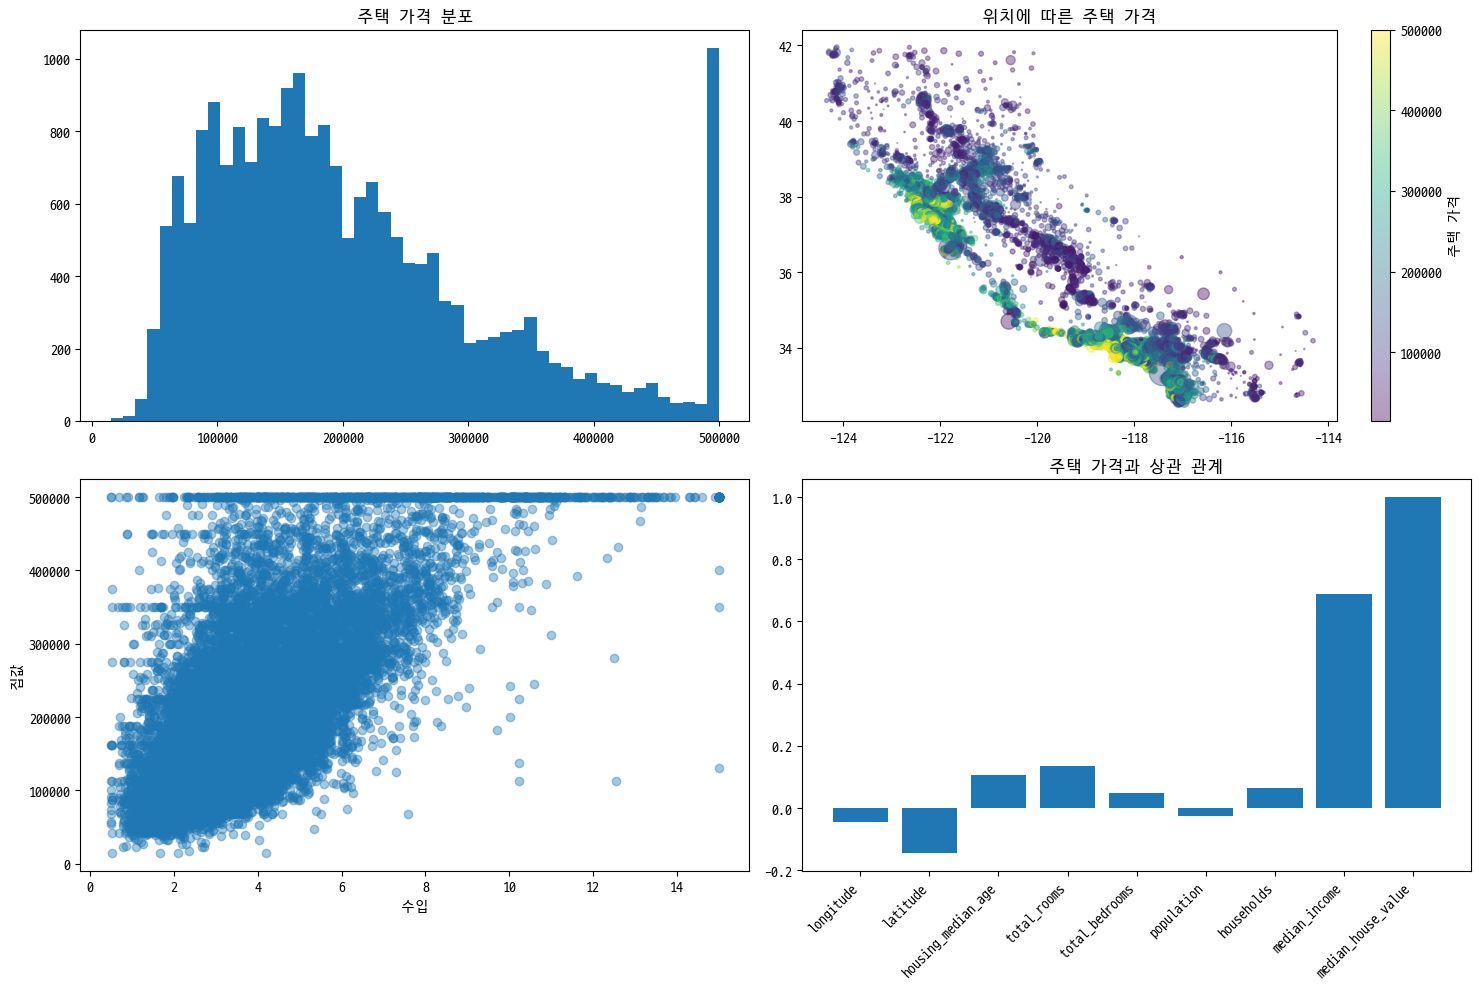

In [4]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(housing["median_house_value"], bins=50)
plt.title('주택 가격 분포')

plt.subplot(2, 2, 2)
plt.scatter(housing['longitude'], housing['latitude'], 
            alpha=0.4, s=housing["population"]/100, 
            c=housing["median_house_value"], cmap="viridis")
plt.colorbar(label="주택 가격")
plt.title("위치에 따른 주택 가격")

plt.subplot(2, 2, 3)
plt.scatter(housing['median_income'], housing["median_house_value"], alpha=0.4)
plt.xlabel("수입")
plt.ylabel("집값")

corr = housing.corr(numeric_only=True)
plt.subplot(2, 2, 4)
plt.bar(corr["median_house_value"].index,
        corr["median_house_value"].values,)
plt.title("주택 가격과 상관 관계")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [5]:
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
numnerical_feat = X.select_dtypes(include=["int64", "float64"]).columns # 데이터 타입은 웬만하면 다 float으로 바꿔라
categorical_feat = ["ocean_proximity"]

In [8]:
from sklearn.impute import SimpleImputer # 빈값을 빠르고 쉽게 체우고 싶을 때 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# numerical_feat
# SimpleImputer
# StandardSacler
# [('scaler', StandardScaler()), ('svc', SVC())

numerical_transformer = Pipeline([('imputer', SimpleImputer(strategy="median")),
                                    ('scaler', StandardScaler())])
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [9]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
    ]
)
# 추론할 때 오류날 가능성이 높음 / # 원핫인코더 매개변수 신경써야 함.

categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [10]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numnerical_feat),
        ("cat", categorical_transformer, categorical_feat),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ocean_proximity'])])

In [11]:
from sklearn.linear_model import LinearRegression

linear_model = Pipeline(
    [("preprocessor", preprocessor), 
     ("reressor", LinearRegression())]
)
linear_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('reressor', LinearRegression())])

In [12]:
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_predictions

array([ 54811.88242313, 123864.33890936, 252845.43705076, ...,
       140614.11326652, 243327.82857325, 350156.23528829])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

linear_mse = mean_squared_error(y_test, linear_predictions)
## 위 아래 기준으로 수치 / 오차를 제곱

linear_mae = np.sqrt(linear_mse) # 내 평균으로 부터 오차의 범위 / 윗쪽 오차와, 아래쪽 오차 2개가 있음, 이것 중 어떤 것이 좋을까?? 절대값으로 변경
# 즉 나온 수만큼 오차가 있는 것인데, 루트로 음수를 다 땠으니 아래쪽인지 위인지 모름 / 

# 결정계수 => 우리가 만든 오차 모델이 뱉아낸 오차가 가진 신뢰도 60% 
# 0으로 갈수록 노이즈가 적고 양질의 데이터를 가진 것.
linear_r2 = r2_score(y_test, linear_predictions)
print(f"{linear_mse}, {linear_mae}, {linear_r2}")

# r2 = 0~1 사이 수가 나와야 하며 1로 갈 수록 좋음 / 설명력
# mae = 0으로 다가갈 수록 좋음 / 잘 안씀
# mse = 위아래 오차를 합친 것 / 많이 씀

# 평가 지표는 반드시 봐야 함.

4796735617.124312, 69258.4696418013, 0.6374947108633109


In [19]:
# 랜덤 포레스트 사용
from sklearn.ensemble import RandomForestRegressor

# 1. 전처리
forest_model = Pipeline(
    [
    ("preprocessor", preprocessor), 
    ("regressor", RandomForestRegressor())
    ]
)

# 지도학습의 모델들은 MeanMax를 쓴 애들이 있다. 
# 파이프라인 하기 전에 쭉 써라
forest_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['ocean_proximity'])])),
                ('regressor', RandomForestRegressor())])

In [20]:
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_predictions

array([ 48412.  ,  68603.  , 462346.4 , ..., 121323.  , 259701.  ,
       421944.29])

In [21]:
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_mae = np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, forest_predictions)
print(f"{forest_mse}, {forest_mae}, {forest_r2}")

2367728777.049051, 48659.31336392912, 0.8210628491057023


In [ ]:
from sklearn.model_selection import cross_val_score

linear_scores = cross_val_score(linear_model, X, y, cv=5, scoring="neg_mean_squared_error")
linear_rmse_scores = np.sqrt(-linear_scores)

# cv를 쓰는 애들은 rmse 값을 써라. 

print(f"{linear_scores}, {linear_scores.mean()}, {linear_rmse_scores.std()}")
# rmse는 작을 수록 좋음.
# neg_mean_squared_error 쓰고 
# RMSE - 이상치에 굉장히 민감함
# mse에 루트를 붙인거라 설계 오차와 굉장히 유사함

[-5.40218314e+09 -5.72458107e+09 -5.75765496e+09 -5.94197800e+09
 -4.42270855e+09], -5449821144.21343, 3791.4279887813996


In [24]:
forest_scores = cross_val_score(forest_model, X, y, cv=5, scoring="neg_mean_squared_error")
forest_rmse_scores = np.sqrt(-forest_scores)

# cv를 쓰는 애들은 rmse 값을 써라. 

print(f"{forest_scores}, {forest_scores.mean()}, {forest_rmse_scores.std()}")

[-7.09732516e+09 -4.54233723e+09 -4.26572587e+09 -8.85435697e+09
 -5.15933744e+09], -5983816533.435263, 10949.796877541981


In [25]:
X_trian_prepared = preprocessor.fit_transform(X_train)

In [27]:
forest = RandomForestRegressor()
forest.fit(X_trian_prepared, y_train)

RandomForestRegressor()

In [32]:
one = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feat_names = one.get_feature_names_out(['ocean_proximity'])
feat_names = list(numnerical_feat) + list(cat_feat_names)
feat_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

In [ ]:
# 지우고 혼자 해봐야 함.
# np 선형대수를 기반으로 맞춘거라 선형대수 연산자가 우선 순위임.
imp = forest.feature_importances_
idx = np.argsort(imp)[::-1]
for i in range(len(imp)):
    if i < len(feat_names):
        print(f"f{feat_names[i]}:{imp[idx[i]]}")

flongitude:0.4878701684373613
flatitude:0.1420247225584279
fhousing_median_age:0.10632282987368115
ftotal_rooms:0.10069596022167557
ftotal_bedrooms:0.05185623518765131
fpopulation:0.03253083831098107
fhouseholds:0.02461945332801629
fmedian_income:0.024072914327929497
focean_proximity_<1H OCEAN:0.0183807289204656
focean_proximity_INLAND:0.007005429678548688
focean_proximity_ISLAND:0.0034561178629087543
focean_proximity_NEAR BAY:0.0008276806437291133
focean_proximity_NEAR OCEAN:0.0003369206486237299


In [37]:
import joblib

# 만든 모델을 압축해서 올림
joblib.dump(forest_model, 'housing_v1.pkl')

# 배포 해봐야 한다. (aws 써서)

['housing_v1.pkl']

In [38]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
def predict_housing_v1(longitude, latitude,
                        housing_median_age,
                        total_rooms,
                        total_bedrooms,
                        population,
                        households,
                        median_income,
                        ocean_proximity):
    
    input_data = pd.DataFrame({
        'longitude' : [longitude],
        'latitude' : [latitude],
        'housing_median_age': [housing_median_age],
        'total_rooms' : [total_rooms],
        'total_bedrooms' : [total_bedrooms],
        'population' : [population],
        'households' : [households],
        'median_income' : [median_income],
        'ocean_proximity' :[ocean_proximity],
    })
    
    model = joblib.load("housing_v1.pkl")
    return model.predict(input_data)[0]




    #1. 사용자 입력을 받아야 함
    #2. 모델을 불러와야 함
    #3. 모델에 해당 데이터를 입력
    #4. 결과를 출력

In [ ]:
test_sample = X_test.iloc[0].copy()
actual_price = y_test.iloc[0]
predict_price = predict_housing_v1(
    test_sample["longitude"],
    test_sample["latitude"],
    test_sample["housing_median_age"],
    test_sample["total_rooms"],
    test_sample["total_bedrooms"],
    test_sample["population"],
    test_sample["households"],
    test_sample["median_income"],
    test_sample["ocean_proximity"],
)

predict_price

# pkl 파일이 내가 만든 모델임

np.float64(48412.0)